In [80]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [81]:
labels = ['Backstrap_best','Backstrap_nobest','Buckle_best','Buckle_nobest','Hook_best','Hook_nobest','Laceup_best','Laceup_nobest','Slip_best','Slip_nobest','zipper_best','zipper_nobest']

In [82]:
vgg_model = VGG19(weights='imagenet', include_top=False)

In [83]:
x = vgg_model.output
x = GlobalAveragePooling2D()(x)

# add fully-connected layer
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

# add output layer
predictions = Dense(12, activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=predictions)

In [84]:
model.load_weights('fine_tune_shoes_after_clustering2_multiclass.best.hdf5')

In [85]:
def identify_type(images , labels):
    
    w=200
    h=200
    fig=plt.figure(figsize=(8, 8))
    columns = 5
    rows = 1
    for i in range(1, len(images)+1):
        img = cv2.imread(images[i-1])
        img = cv2.resize(img, (w,h))
        fig.add_subplot(rows, columns, i)
        plt.axis('off')
        plt.imshow(img)
    plt.show()
    
    best_image_index = 0
    type_score = dict()
    for i,j in enumerate(images) :
        image = cv2.imread(j)
        image = cv2.resize(image, (224,224))
        # image = image.astype("float") /255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        proba = model.predict(image)[0]
        idxs = np.argsort(proba)[::-1][:1]
        type_score[i] = {proba[idxs[0]] : labels[idxs[0]]}
    
    print (type_score)
    best_image = dict()
    for key,i in type_score.items() :
        type_image  = list(i.values())[0]
        score = list(i.keys())[0]
        if type_image.split('_')[1] == 'best':
            best_image[score] = type_image.split('_')[0]
    temp_dict = dict()
    for key,value in type_score.items():
        temp_dict[list(value.keys())[0]]=list(value.values())[0]
        
    if len(best_image) == 1:
        print ( 'Type of footwear = ',(list(best_image.values())[0]).split('_')[0])
#         print (" 1 best image")
        best_image_index = list(temp_dict.keys()).index(list(best_image.keys())[0])+1 
        print ('Best image =' , best_image_index )
#         print ('Best Image = ', list(temp_dict.keys()).index(max_score)+1)
        
    if len(best_image) > 1 :
        max_score = max(list(best_image.keys()))
        best_image_index = list(temp_dict.keys()).index(max_score)+1
        print ('Type of footwear = ',best_image[max_score].split('_')[0])
#         print ('Mulitple best images')
        print ('Best image =' , best_image_index )
        
    if len(best_image) == 0 :
        max_score = max(list(temp_dict.keys()))
        best_image_index = list(temp_dict.keys()).index(max_score)+1
        print ('Type of footwear = ',temp_dict[max_score].split('_')[0])
        print ('Best Image = ', best_image_index)    
        
    print ("Best Image == ")
    img = cv2.imread(images[best_image_index-1])
    img = cv2.resize(img, (w,h))
    plt.axis('off')
    plt.imshow(img)
    

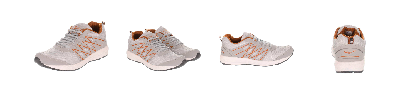

{0: {0.99117213: 'Laceup_best'}, 1: {0.9999999: 'Laceup_best'}, 2: {0.81971526: 'Laceup_nobest'}, 3: {0.99589515: 'Laceup_nobest'}}
Type of footwear =  Laceup
Best image = 2
Best Image == 


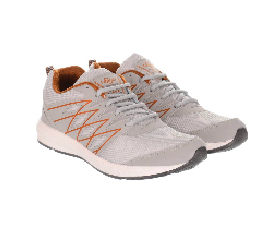

In [94]:
images = ['/Users/amit.peshwani/Desktop/Shoes_case_study/amazon_test/lace_up_test6_view_1.jpg','/Users/amit.peshwani/Desktop/Shoes_case_study/amazon_test/lace_up_test6_view_2.jpg','/Users/amit.peshwani/Desktop/Shoes_case_study/amazon_test/lace_up_test6_view_3.jpg','/Users/amit.peshwani/Desktop/Shoes_case_study/amazon_test/lace_up_test6_view_4.jpg']
identify_type(images , labels)